In [ ]:
!pip install pandas
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd

od.download(
    "https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction")

Skipping, found downloaded files in "./heart-failure-prediction" (use force=True to force download)


Age (Wiek) - wiek pacjenta w latach (typ danych: int64)

Sex (Płeć) - płeć pacjenta (typ danych: object)

ChestPainType (Typ bólu w klatce piersiowej) - typ bólu w klatce piersiowej pacjenta (typ danych: object)

RestingBP (Spoczynkowe ciśnienie krwi) - spoczynkowe ciśnienie krwi pacjenta (w mmHg) (typ danych: int64)

Cholesterol (Cholesterol) - poziom cholesterolu pacjenta (w mg/dl) (typ danych: int64)

FastingBS (Cukier na czczo) - poziom cukru we krwi na czczo pacjenta (typ danych: int64)

RestingECG (Spoczynkowe EKG) - wynik elektrokardiogramu spoczynkowego pacjenta (typ danych: object)

MaxHR (Maksymalne tętno) - maksymalne osiągnięte tętno pacjenta podczas testu wysiłkowego (typ danych: int64)

ExerciseAngina (Dławica wysiłkowa) - czy pacjent doświadcza bólu w klatce piersiowej spowodowanego wysiłkiem fizycznym (typ danych: object)

Oldpeak (ST-depresja) - depresja odcinka ST wywołana wysiłkiem fizycznym w stosunku do odpoczynku (typ danych: float64)

ST_Slope (Nachylenie odcinka ST) - nachylenie odcinka ST podczas wysiłku (typ danych: object)

HeartDisease (Choroba serca) - czy pacjent ma chorobę serca (0 - nie, 1 - tak) (typ danych: int64)

In [ ]:
df = pd.read_csv('/content/heart-failure-prediction/heart.csv')

In [ ]:
columns = list(df.columns)

categorical_features = []
numerical_features = []

for column in columns:
    if len(df[column].unique()) > 10:
        numerical_features.append(column)
    else:
        categorical_features.append(column)

In [ ]:
print('Categorical Features: ', categorical_features, "\n")
print('Numerical Features :', numerical_features)

Categorical Features:  ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease'] 

Numerical Features : ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [ ]:
df.head().T

,0,1,2,3,4
Age,40,49,37,48,54
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingBP,140,160,130,138,150
Cholesterol,289,180,283,214,195
FastingBS,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal
MaxHR,172,156,98,108,122
ExerciseAngina,N,N,N,Y,N
Oldpeak,0.0,1.0,0.0,1.5,0.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] = df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']].astype('string')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [ ]:
HeartDisease = df[df['HeartDisease'] == 1].describe().T
NoHeartDisease = df[df['HeartDisease'] == 0].describe().T

In [ ]:
HeartDisease

,count,mean,std,min,25%,50%,75%,max
Age,508.0,55.899606,8.727056,31.0,51.0,57.0,62.00,77.0
RestingBP,508.0,134.185039,19.828685,0.0,120.0,132.0,145.00,200.0
Cholesterol,508.0,175.940945,126.391398,0.0,0.0,217.0,267.00,603.0
FastingBS,508.0,0.334646,0.472332,0.0,0.0,0.0,1.00,1.0
MaxHR,508.0,127.655512,23.386923,60.0,112.0,126.0,144.25,195.0
Oldpeak,508.0,1.274213,1.151872,-2.6,0.0,1.2,2.00,6.2
HeartDisease,508.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0


In [ ]:
NoHeartDisease

,count,mean,std,min,25%,50%,75%,max
Age,410.0,50.551220,9.444915,28.0,43.00,51.0,57.00,76.0
RestingBP,410.0,130.180488,16.499585,80.0,120.00,130.0,140.00,190.0
Cholesterol,410.0,227.121951,74.634659,0.0,197.25,227.0,266.75,564.0
FastingBS,410.0,0.107317,0.309894,0.0,0.00,0.0,0.00,1.0
MaxHR,410.0,148.151220,23.288067,69.0,134.00,150.0,165.00,202.0
Oldpeak,410.0,0.408049,0.699709,-1.1,0.00,0.0,0.60,4.2
HeartDisease,410.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [ ]:
heart_disease_chest_pain = df[df['HeartDisease']==1]['ChestPainType'].value_counts()
no_heart_disease_chest_pain = df[df['HeartDisease']==0]['ChestPainType'].value_counts()

print("Osoby z chorobą serca:\n", heart_disease_chest_pain)
print("Osoby bez choroby serca:\n", no_heart_disease_chest_pain)

Osoby z chorobą serca:
 ASY    392
NAP     72
ATA     24
TA      20
Name: ChestPainType, dtype: Int64
Osoby bez choroby serca:
 ATA    149
NAP    131
ASY    104
TA      26
Name: ChestPainType, dtype: Int64


In [ ]:
heart_disease_sex = df[df['HeartDisease']==1]['Sex'].value_counts()
no_heart_disease_sex = df[df['HeartDisease']==0]['Sex'].value_counts()

print("Osoby z chorobą serca:\n", heart_disease_sex)
print("Osoby bez choroby serca:\n", no_heart_disease_sex)

Osoby z chorobą serca:
 M    458
F     50
Name: Sex, dtype: Int64
Osoby bez choroby serca:
 M    267
F    143
Name: Sex, dtype: Int64


In [ ]:
heart_disease_RestingECG = df[df['HeartDisease']==1]['RestingECG'].value_counts()
no_heart_disease_RestingECG = df[df['HeartDisease']==0]['RestingECG'].value_counts()

print("Osoby z chorobą serca:\n", heart_disease_RestingECG)
print("Osoby bez choroby serca:\n", no_heart_disease_RestingECG)

Osoby z chorobą serca:
 Normal    285
ST        117
LVH       106
Name: RestingECG, dtype: Int64
Osoby bez choroby serca:
 Normal    267
LVH        82
ST         61
Name: RestingECG, dtype: Int64


In [ ]:
heart_disease_ExerciseAngina = df[df['HeartDisease']==1]['ExerciseAngina'].value_counts()
no_heart_disease_ExerciseAngina = df[df['HeartDisease']==0]['ExerciseAngina'].value_counts()

print("Osoby z chorobą serca:\n", heart_disease_ExerciseAngina)
print("Osoby bez choroby serca:\n", no_heart_disease_ExerciseAngina)

Osoby z chorobą serca:
 Y    316
N    192
Name: ExerciseAngina, dtype: Int64
Osoby bez choroby serca:
 N    355
Y     55
Name: ExerciseAngina, dtype: Int64


In [ ]:
heart_disease_ST_Slope = df[df['HeartDisease']==1]['ST_Slope'].value_counts()
no_heart_disease_ST_Slope = df[df['HeartDisease']==0]['ST_Slope'].value_counts()

print("Osoby z chorobą serca:\n", heart_disease_ST_Slope)
print("Osoby bez choroby serca:\n", no_heart_disease_ST_Slope)

Osoby z chorobą serca:
 Flat    381
Up       78
Down     49
Name: ST_Slope, dtype: Int64
Osoby bez choroby serca:
 Up      317
Flat     79
Down     14
Name: ST_Slope, dtype: Int64


In [ ]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


# Wizualizacja danych

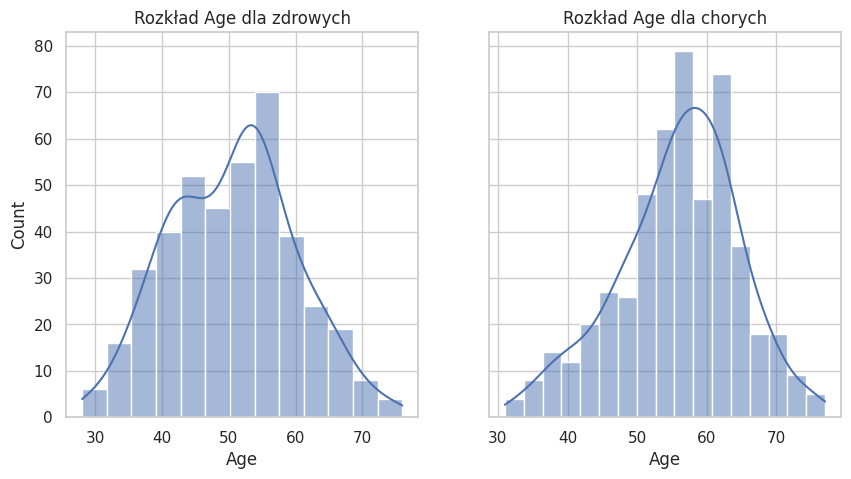

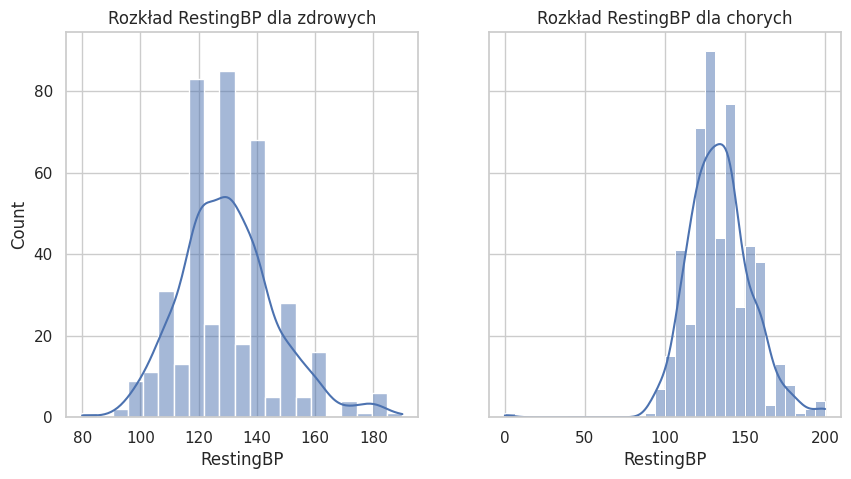

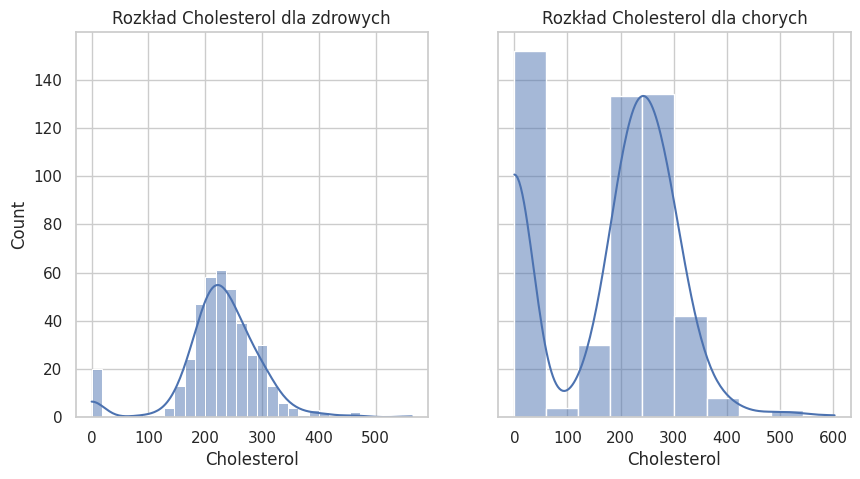

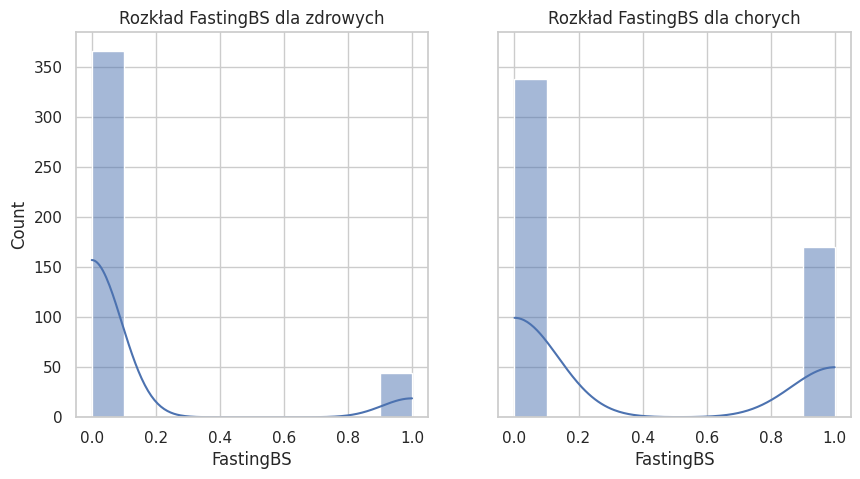

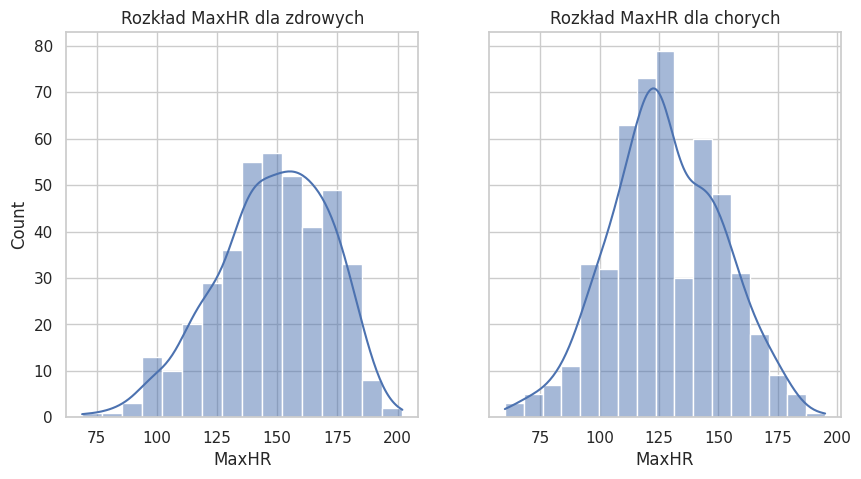

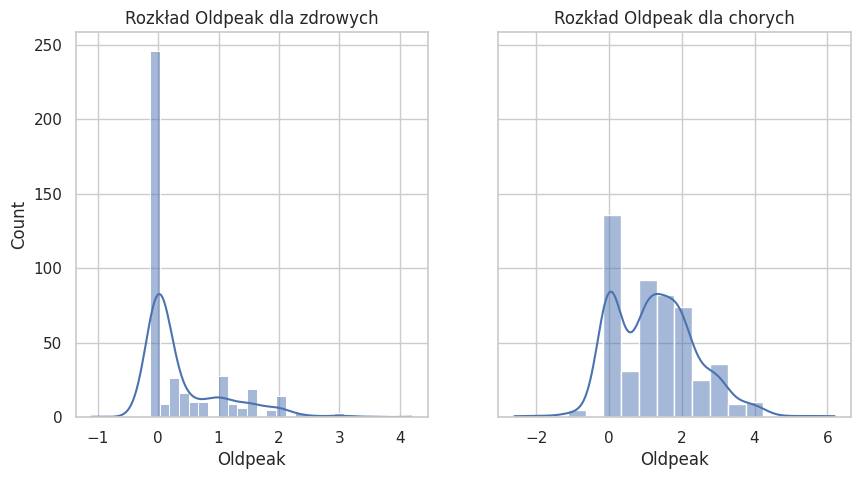

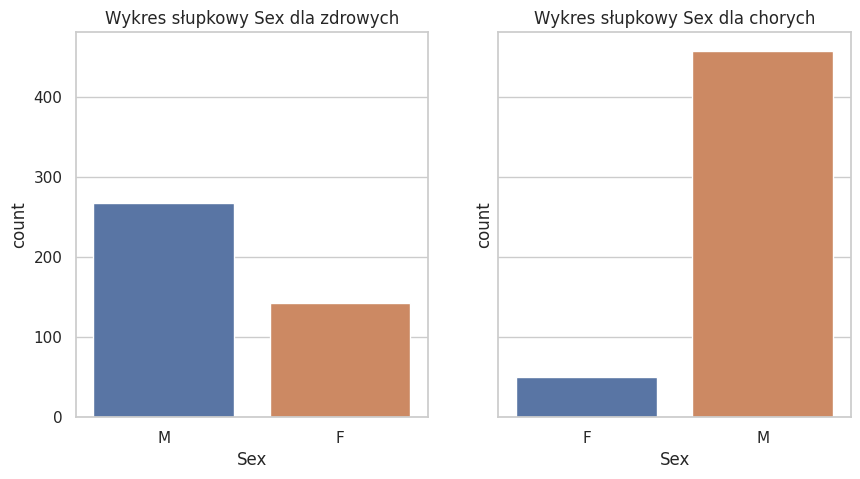

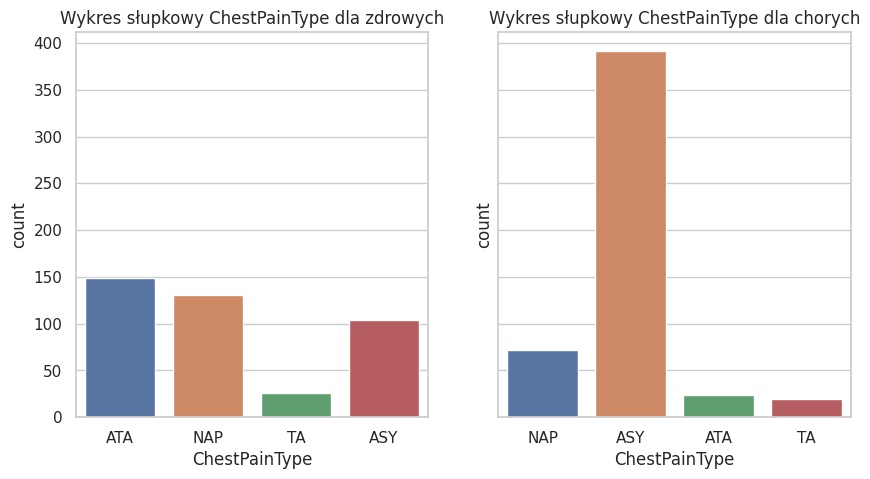

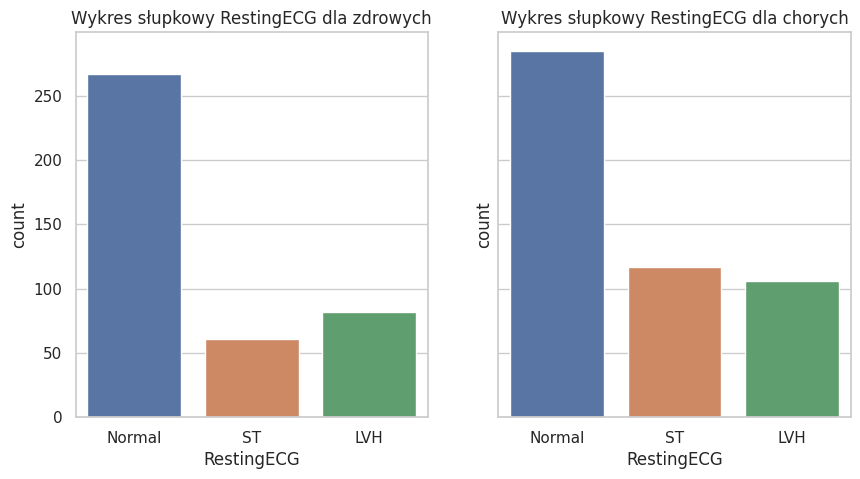

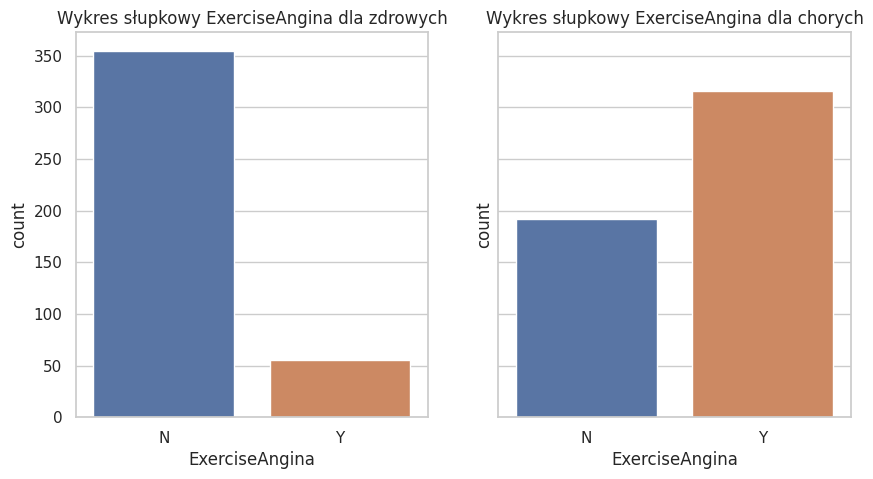

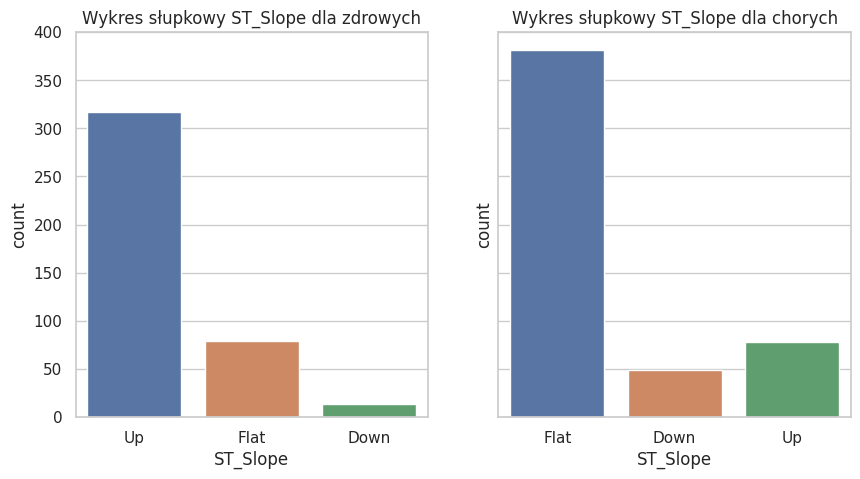

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Następnie podziel DataFrame na podzbiory HeartDisease i NoHeartDisease
HeartDisease = df[df['HeartDisease'] == 1]
NoHeartDisease = df[df['HeartDisease'] == 0]

# Ustaw styl Seaborn
sns.set(style="whitegrid")

# Lista zmiennych liczbowych
numerical_vars = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]

# Lista zmiennych kategorycznych
categorical_vars = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

# Wizualizuj zmienne liczbowe
for var in numerical_vars:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    sns.histplot(NoHeartDisease[var], kde=True, ax=axs[0])
    axs[0].set_title(f"Rozkład {var} dla zdrowych")
    sns.histplot(HeartDisease[var], kde=True, ax=axs[1])
    axs[1].set_title(f"Rozkład {var} dla chorych")
    plt.show()

# Wizualizuj zmienne kategoryczne
for var in categorical_vars:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    sns.countplot(x=var, data=NoHeartDisease, ax=axs[0])
    axs[0].set_title(f"Wykres słupkowy {var} dla zdrowych")
    sns.countplot(x=var, data=HeartDisease, ax=axs[1])
    axs[1].set_title(f"Wykres słupkowy {var} dla chorych")
    plt.show()

# Macierz korelacji

<ipython-input-53-1d411700e117>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


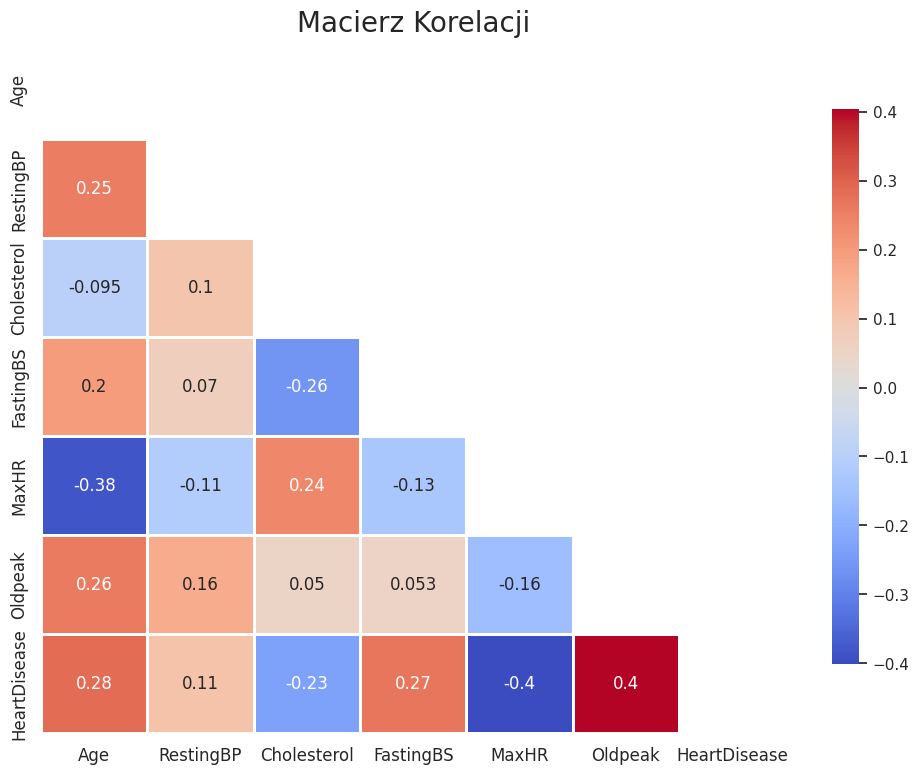

In [ ]:
import numpy as np

# Oblicz macierz korelacji
corr_matrix = df.corr()

# Ustaw styl Seaborn
sns.set(style="white")

# Utwórz maskę, aby ukryć górną połowę macierzy korelacji (ponieważ jest lustrzanym odbiciem dolnej połowy)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Ustaw rozmiar mapy cieplnej
plt.figure(figsize=(12, 9))

# Utwórz mapę cieplną korzystając z Seaborn
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", linewidths=1, cbar_kws={"shrink": .8})

# Dodaj tytuł
plt.title("Macierz Korelacji", fontsize=20)

# Ustaw czcionkę etykiet osi
heatmap.tick_params(axis='both', which='major', labelsize=12)

# Wyświetl mapę cieplną
plt.show()

In [ ]:
print("Macierz Korelacji:")
print(corr_matrix)

Macierz Korelacji:
                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


#Przetwarzanie wstępne danych



In [ ]:
# Zamień wartości tekstowe na wartości liczbowe
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ChestPainType'] = df['ChestPainType'].map({'TA': 1, 'ATA': 2, 'NAP': 3, 'ASY': 4})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df['ST_Slope'] = df['ST_Slope'].map({'Up': 1, 'Flat': 2, 'Down': 3})

# Zamień wartości przedziałowe na średnią z przedziału
df['Cholesterol'] = df['Cholesterol'].replace('230-240', 235)

# Konwertuj kolumnę "Cholesterol" na wartości liczbowe
df['Cholesterol'] = df['Cholesterol'].astype(float)

# Przetworzenie zmiennych kategorycznych
df = pd.get_dummies(df, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=True)

# Definiowanie cech (X) i etykiet (y)
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

#Regresja logistyczna

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzenie modelu regresji logistycznej
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

# Trenowanie modelu na danych treningowych
log_reg.fit(X_train, y_train)

# Przewidywanie na danych testowych
y_pred = log_reg.predict(X_test)

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu regresji logistycznej: {accuracy:.2f}")

# Macierz pomyłek
conf_matrix_log_reg = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(conf_matrix_log_reg)

# Raport klasyfikacji
class_report_log_reg = classification_report(y_test, y_pred)
print("Raport klasyfikacji:")
print(class_report_log_reg)

Dokładność modelu regresji logistycznej: 0.86
Macierz pomyłek:
[[66 11]
 [15 92]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        77
           1       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



#Drzewa decyzyjne

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzenie modelu drzewa decyzyjnego
decision_tree = DecisionTreeClassifier(random_state=42)

# Trenowanie modelu na danych treningowych
decision_tree.fit(X_train, y_train)

# Przewidywanie na danych testowych
y_pred = decision_tree.predict(X_test)

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu drzewa decyzyjnego: {accuracy:.2f}")

# Macierz pomyłek
conf_matrix_decision_trees = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(conf_matrix_decision_trees)

# Raport klasyfikacji
class_report_decision_trees = classification_report(y_test, y_pred)
print("Raport klasyfikacji:")
print(class_report_decision_trees)

Dokładność modelu drzewa decyzyjnego: 0.80
Macierz pomyłek:
[[64 13]
 [24 83]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        77
           1       0.86      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



# Naiwny klasyfikator bayesowski

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzenie modelu naiwnego klasyfikatora bayesowskiego
naive_bayes = GaussianNB()

# Trenowanie modelu na danych treningowych
naive_bayes.fit(X_train, y_train)

# Przewidywanie na danych testowych
y_pred = naive_bayes.predict(X_test)

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu naiwnego klasyfikatora bayesowskiego: {accuracy:.2f}")

# Macierz pomyłek
conf_matrix_naive_bayes = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(conf_matrix_naive_bayes)

# Raport klasyfikacji
class_report_naive_bayes = classification_report(y_test, y_pred)
print("Raport klasyfikacji:")
print(class_report_naive_bayes)

Dokładność modelu naiwnego klasyfikatora bayesowskiego: 0.84
Macierz pomyłek:
[[65 12]
 [17 90]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



#SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzenie modelu SVM
svm_model = SVC(kernel='linear', random_state=42)

# Trenowanie modelu na danych treningowych
svm_model.fit(X_train, y_train)

# Przewidywanie na danych testowych
y_pred = svm_model.predict(X_test)

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu SVM: {accuracy:.2f}")

# Macierz pomyłek
conf_matrix_svc = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(conf_matrix_svc)

# Raport klasyfikacji
class_report_svc = classification_report(y_test, y_pred)
print("Raport klasyfikacji:")
print(class_report_svc)

Dokładność modelu SVM: 0.86
Macierz pomyłek:
[[67 10]
 [16 91]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



#XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Podział danych na zbiory treningowy i testowy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Tworzenie modelu XGBoost

xgb_model = xgb.XGBClassifier(random_state=42)

#Trenowanie modelu na danych treningowych

xgb_model.fit(X_train, y_train)

#Przewidywanie na danych testowych

y_pred = xgb_model.predict(X_test)

#Obliczenie dokładności modelu

accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu XGBoost: {accuracy:.2f}")

#Macierz pomyłek

conf_matrix_xgb = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(conf_matrix_xgb)

#Raport klasyfikacji

class_report_xgb = classification_report(y_test, y_pred)
print("Raport klasyfikacji:")
print(class_report_xgb)

Dokładność modelu XGBoost: 0.89
Macierz pomyłek:
[[69  8]
 [13 94]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



#Sieci neuronowe

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Przeskalowanie cech, ponieważ sieci neuronowe są wrażliwe na skalowanie danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tworzenie modelu sieci neuronowej
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', random_state=42)

# Trenowanie modelu na danych treningowych
mlp_model.fit(X_train, y_train)

# Przewidywanie na danych testowych
y_pred = mlp_model.predict(X_test)

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu sieci neuronowej: {accuracy:.2f}")

# Macierz pomyłek
conf_matrix_nn = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(conf_matrix_nn)

# Raport klasyfikacji
class_report_nn = classification_report(y_test, y_pred)
print("Raport klasyfikacji:")
print(class_report_nn)

Dokładność modelu sieci neuronowej: 0.85
Macierz pomyłek:
[[66 11]
 [16 91]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        77
           1       0.89      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback
from tqdm.keras import TqdmCallback

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Przeskalowanie cech
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Budowa modelu
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0,
    callbacks=[TqdmCallback(verbose=1)]
)

# Przewidywanie na danych testowych
y_pred_raw = model.predict(X_test)
y_pred = np.round(y_pred_raw).flatten()

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność zoptymalizowanej sieci neuronowej: {accuracy:.2f}")

# Macierz pomyłek
conf_matrix_keras = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(conf_matrix_keras)

# Raport klasyfikacji
class_report_keras = classification_report(y_test, y_pred)
print("Raport klasyfikacji:")
print(class_report_keras)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

6/6 [==============================] - 0s 2ms/step
Dokładność zoptymalizowanej sieci neuronowej: 0.84
Macierz pomyłek:
[[67 10]
 [19 88]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        77
           1       0.90      0.82      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



#Keras z Dropout

In [ ]:
from keras.layers import Dropout, BatchNormalization
from keras.regularizers import l2

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Przeskalowanie cech
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Budowa modelu
model_keras_improved = Sequential()
model_keras_improved.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
model_keras_improved.add(BatchNormalization())
model_keras_improved.add(Dropout(0.5))  # Dodanie warstwy Dropout
model_keras_improved.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model_keras_improved.add(BatchNormalization())
model_keras_improved.add(Dropout(0.5))  # Dodanie warstwy Dropout
model_keras_improved.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model_keras_improved.add(BatchNormalization())
model_keras_improved.add(Dropout(0.5))  # Dodanie warstwy Dropout
model_keras_improved.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
model_keras_improved.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
history = model_keras_improved.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,  # Zwiększenie liczby epok
    batch_size=32,
    verbose=0,
    callbacks=[TqdmCallback(verbose=1)]
)

# Przewidywanie na danych testowych
y_pred_raw = model_keras_improved.predict(X_test)
y_pred = np.round(y_pred_raw).flatten()

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność zoptymalizowanej sieci neuronowej: {accuracy:.2f}")

# Macierz pomyłek
conf_matrix_keras_improved = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(conf_matrix_keras_improved)

# Raport klasyfikacji
class_report_keras_improved = classification_report(y_test, y_pred)
print("Raport klasyfikacji:")
print(class_report_keras_improved)

model_keras_improved.save('keras_model.h5')

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

6/6 [==============================] - 0s 2ms/step
Dokładność zoptymalizowanej sieci neuronowej: 0.84
Macierz pomyłek:
[[68  9]
 [20 87]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 9.1 MB/s eta 0:00:00


# Dobór odpowiednich hiperparametrów

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Przeskalowanie cech
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definicja modelu z hiperparametrami
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_input', min_value=32, max_value=128, step=16),
                            activation='relu',
                            input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units_hidden', min_value=16, max_value=64, step=16),
                            activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

# Inicjalizacja tunera
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='hptune'
)

# Przeszukiwanie przestrzeni hiperparametrów
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

# Wybranie najlepszego zestawu hiperparametrów
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Trenowanie modelu z optymalnymi hiperparametrami
best_model = tuner.hypermodel.build(best_hyperparameters)
history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

# Ewaluacja modelu na zbiorze testowym
_, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# Generowanie predykcji dla zbioru testowego
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Macierz pomyłek
conf_matrix_keras_improved = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(conf_matrix_keras_improved)

# Raport klasyfikacji
class_report_keras_improved = classification_report(y_test, y_pred)
print("Raport klasyfikacji:")
print(class_report_keras_improved)

6/6 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8750
Test accuracy: 0.88
6/6 [==============================] - 0s 2ms/step
Macierz pomyłek:
[[69  8]
 [15 92]]
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        77
           1       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



# Porównanie modeli

Model: Logistic Regression
Accuracy: 0.85
Precision: 0.90
Recall: 0.84
F1 Score: 0.87
ROC AUC: 0.93
TP: 90, TN: 67, FP: 10, FN: 17
------------------------------
Model: Decision Tree
Accuracy: 0.80
Precision: 0.86
Recall: 0.78
F1 Score: 0.82
ROC AUC: 0.80
TP: 83, TN: 64, FP: 13, FN: 24
------------------------------
Model: Naive Bayes
Accuracy: 0.84
Precision: 0.88
Recall: 0.84
F1 Score: 0.86
ROC AUC: 0.92
TP: 90, TN: 65, FP: 12, FN: 17
------------------------------
Model: SVM
Accuracy: 0.88
Precision: 0.90
Recall: 0.88
F1 Score: 0.89
ROC AUC: 0.94
TP: 94, TN: 67, FP: 10, FN: 13
------------------------------
Model: XGBoost
Accuracy: 0.89
Precision: 0.92
Recall: 0.88
F1 Score: 0.90
ROC AUC: 0.93
TP: 94, TN: 69, FP: 8, FN: 13
------------------------------
6/6 [==============================] - 0s 2ms/step
Model: Optimized Neural Network
Accuracy: 0.88
Precision: 0.91
Recall: 0.88
F1 Score: 0.90
ROC AUC: 0.93
TP: 94, TN: 68, FP: 9, FN: 13
------------------------------


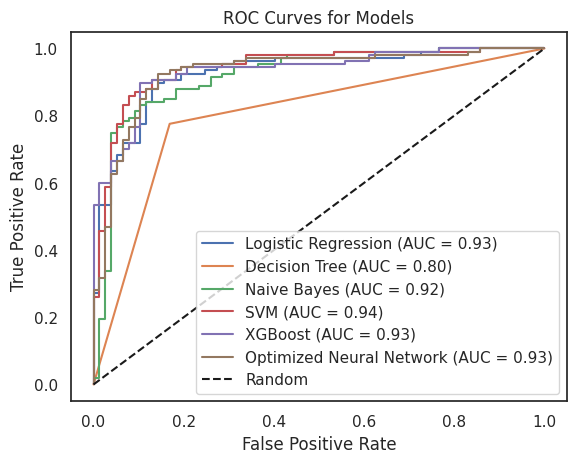

In [ ]:
from xgboost.sklearn import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.models import load_model

# Wczytanie zbudowanych modeli
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()
svm = SVC(probability=True)
xgboost = XGBClassifier()
keras_model = load_model("keras_model.h5")

# Lista modeli
models = [
    ("Logistic Regression", logistic_regression),
    ("Decision Tree", decision_tree),
    ("Naive Bayes", naive_bayes),
    ("SVM", svm),
    ("XGBoost", xgboost),
    ("Optimized Neural Network", keras_model),
]

# Trenowanie i ewaluacja modeli
fig, ax = plt.subplots()

for name, model in models:
    model.fit(X_train, y_train)

    if name == "Optimized Neural Network":
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
        y_pred_proba = model.predict(X_test).flatten()
    else:
        y_pred = model.predict(X_test)
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_proba = model.decision_function(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Obliczenie i wydrukowanie macierzy błędów
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
    print("-" * 30)

    ax.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

ax.plot([0, 1], [0, 1], 'k--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc='lower right')
ax.set_title('ROC Curves for Models')
plt.show()